<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/toxic_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds , ds_info = tfds.load('civil_comments' ,
                        shuffle_files = True,
                        with_info = True)

In [3]:
import pandas as pd

## prepping dataframe

In [4]:
train_sample = ds['train'].shuffle(buffer_size = 2000).take(500000)
val_sample = ds['validation'].shuffle(buffer_size = 2000).take(100000)
test_sample = ds['test'].shuffle(buffer_size = 2000).take(100000)

In [5]:
df_train = pd.DataFrame(train_sample).applymap(lambda x : x.numpy())
df_val = pd.DataFrame(val_sample).applymap(lambda x : x.numpy())
df_test = pd.DataFrame(test_sample).applymap(lambda x : x.numpy())

In [6]:
df_train['text'] = df_train['text'].map(lambda x : str(x)[2:-1])
df_val['text'] = df_val['text'].map(lambda x : str(x)[2:-1])
df_test['text'] = df_test['text'].map(lambda x : str(x)[2:-1])

In [7]:
#removing duplicates as the sampling was done with replacement
df_train = df_train.drop(df_train[df_train.duplicated(keep = 'first')].index)
df_val = df_val.drop(df_val[df_val.duplicated(keep = 'first')].index)
df_test = df_test.drop(df_test[df_test.duplicated(keep = 'first')].index)

In [8]:
df_train.head(10)

,identity_attack,insult,obscene,severe_toxicity,sexual_explicit,text,threat,toxicity
0,0.0,0.0,0.0,0.0,0.0,Oh there is an rural / urban divide about Gun ...,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,Harper paid down 30+ billion in debt during hi...,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,I have a sister who is going on 80 years old a...,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,"What this editorial writer, and many others in...",0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,I have Stage IVc throat cancer and have been f...,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,"In the 1970s, UH Professor Ben Finney, told me...",0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,delete your account,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,Did Justin have to ask Mr. Bronfman 18 times t...,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,Well I don't think governor walker will be mak...,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,Can someone explain what is going on at this I...,0.0,0.0


In [9]:
df_train.isna().sum()

identity_attack    0
insult             0
obscene            0
severe_toxicity    0
sexual_explicit    0
text               0
threat             0
toxicity           0
dtype: int64

In [10]:
df_val.isna().sum()

identity_attack    0
insult             0
obscene            0
severe_toxicity    0
sexual_explicit    0
text               0
threat             0
toxicity           0
dtype: int64

## Visualizing random texts

In [11]:
df_test.isna().sum()

identity_attack    0
insult             0
obscene            0
severe_toxicity    0
sexual_explicit    0
text               0
threat             0
toxicity           0
dtype: int64

In [12]:
import random

random_index = random.randint(0,len(df_train)-9)

for row in df_train[random_index:random_index+9].itertuples():
  _,attack,insult,obscene,severe_toxic,sexual,text,threat,toxic= row
  print(f'text: {str(text)[:]}')
  print(f'text: {len(str(text))}')
  print(f'attack: {attack}, insults: {insult} obscene: {obscene} severe_toxcity : {severe_toxic}, sexual: {sexual} , threat: {threat}, toxic: {toxic}')
  print('-----------------------------------------------------------------------------------------------------------------------------------------------------')

text: There is no way for an employer to not be involved in an employees health care choices if the employee uses his wages or employee benefits plans to acquire those health care services.  It started as the employer's money either way.  \n\nFailing to included such things as blood transfusions or transplants in a health insurance policy because of religious convictions is a refusal of the employer to give employees the ability to act on their own religious convictions.\n\nInclusion of blood transfusions or contraceptives in health insurance provides access to the health care risk pool which spreads the costs over all those who may need those services. This affects all aspects of access to care now, given the control the insurance market has over the health care market and negotiated prices with providers.  Exclude something and the employee faces much higher costs and in some cases a financial ruin if something like blood transfusions are needed.  Yes.  That is coercion.
text: 981
at

In [13]:
pip install vaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
analyzer = SentimentIntensityAnalyzer()

In [16]:
import numpy as np
vfunc = np.vectorize(analyzer.polarity_scores)

In [17]:
df_train['text']

0         Oh there is an rural / urban divide about Gun ...
1         Harper paid down 30+ billion in debt during hi...
2         I have a sister who is going on 80 years old a...
3         What this editorial writer, and many others in...
4         I have Stage IVc throat cancer and have been f...
                                ...                        
499995    Google please. Or just stay in denial over wid...
499996    That's gonna buy a lot of bratwurst! A few bow...
499997                       Thank you... Precisely!\n\n/..
499998    We need more people with his integrity everywh...
499999    While we're rewriting Gomer & Carbon Barbie's ...
Name: text, Length: 496975, dtype: object

In [18]:
df_train['sentiment'] = vfunc(df_train['text'])
df_val['sentiment'] = vfunc(df_val['text'])
df_test['sentiment'] = vfunc(df_test['text'])

In [19]:
df_train.reset_index(drop = True , inplace = True)
df_val.reset_index(drop = True , inplace = True)
df_test.reset_index(drop = True , inplace = True)

In [20]:
df_train = pd.concat([df_train.drop(columns = ['sentiment'] , axis = 'columns') ,pd.json_normalize(df_train['sentiment'])],axis =1 )
df_val = pd.concat([df_val.drop(columns = ['sentiment'] , axis = 'columns') ,pd.json_normalize(df_val['sentiment'])],axis =1 )
df_test = pd.concat([df_test.drop(columns = ['sentiment'] , axis = 'columns') ,pd.json_normalize(df_test['sentiment'])],axis =1 )

In [21]:
df_train[df_train.isnull().any(axis=1)]

,identity_attack,insult,obscene,severe_toxicity,sexual_explicit,text,threat,toxicity,neg,neu,pos,compound


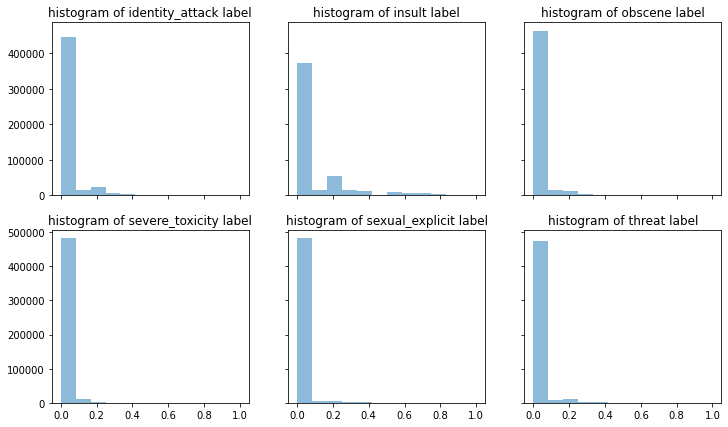

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(12,7))
ax = ax.ravel() 

for idx,columns in enumerate(['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']):
  ax[idx].hist(df_train.loc[:,columns], bins=12, alpha=0.5)
  ax[idx].set_title(f'histogram of {columns} label')

Text(0.5, 1.0, 'target label historgram: toxicity')

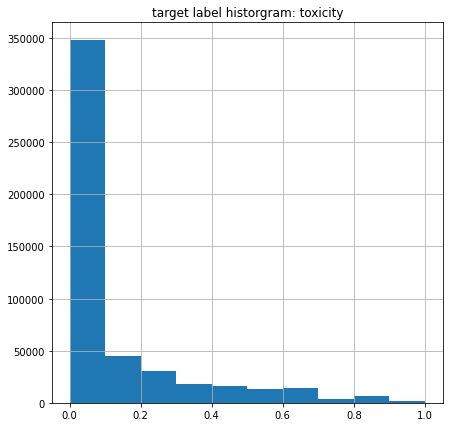

In [23]:
fig,ax = plt.subplots(1,1,figsize = (7,7))
ax = df_train['toxicity'].hist()
ax.set_title(f'target label historgram: toxicity')

In [24]:
def convert_target_class(df,label,threshold):
  '''
  Function to convert target class labels to binary, where positive classes will be where target >= threshold

  df : dataframe
  label : name of the target column, input has to be a string
  threshold : a floating number between 0 and 1
  '''
  temp_df = df.copy()
  temp_df[label] = temp_df[label].map(lambda x : 1 if x >= threshold else 0)

  return temp_df

In [25]:
df_train = convert_target_class(df_train , 'toxicity' , 0.5)
df_val = convert_target_class(df_val , 'toxicity' , 0.5)
df_val = convert_target_class(df_val , 'toxicity' , 0.5)

In [26]:
df_train.toxicity.mean() , df_val.toxicity.mean() , df_test.toxicity.mean()

(0.08034408169425021, 0.07910123018860142, 0.10316588340479929)

In [64]:
X_train = df_train['text']
X_train_indicators = df_train[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']]
y_train = df_train['toxicity']

X_val = df_val['text']
X_val_indicators = df_val[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']]
y_val = df_val['toxicity']

X_test = df_test['text']
X_val_indicators = df_val[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat']]
y_test = df_test['toxicity']

In [28]:
len(X_train),len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(496975, 496975, 96977, 96977, 96972, 96972)

In [29]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [31]:
text_vec = TextVectorization(max_tokens= 10000,
                             standardize = 'lower_and_strip_punctuation',
                             split = 'whitespace',
                             ngrams = None,
                             output_mode = 'int',
                             output_sequence_length = None, #pad text to have the same length as the longest text,
                             pad_to_max_tokens = True)

In [32]:
#Average number of tokens in the training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

51

In [33]:
#setup text vectorization variables
max_vocab_length = 10000 # max num of words to have in our vocab
max_length = 51 # max length of our sequence

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_sequence_length = max_length)

In [34]:
#Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [35]:
sample_sentence = "Trump is awesome!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 51), dtype=int64, numpy=
array([[  59,    7, 3070,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]])>

In [36]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

In [37]:
print(top_5_words)
print(bottom_5_words)

['', '[UNK]', 'the', 'to', 'and']
['assemble', 'ar', 'advancing', 'adopting', 'absorbed']


In [38]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding

## Baseline model

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [40]:
model_0 = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',MultinomialNB())])

In [41]:
model_0.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [42]:
from sklearn.metrics import accuracy_score , f1_score

In [43]:
model_0.score(X_val , y_val)

0.9217649545768585

In [44]:
base_preds = model_0.predict(X_val)

In [45]:
f1_score(y_val , base_preds ,average = 'weighted')

0.8853032474032854

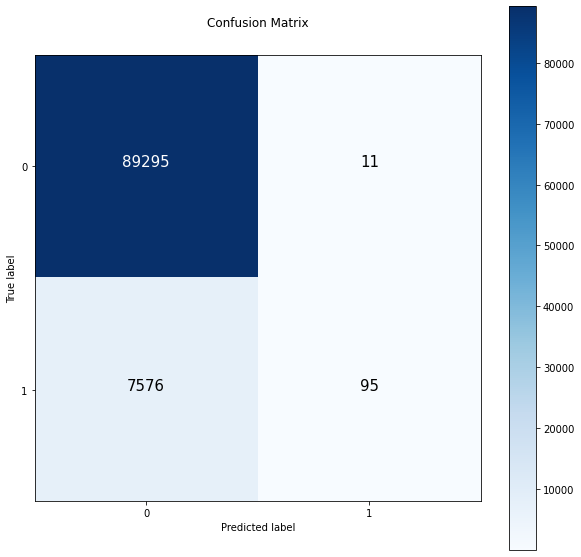

In [46]:
make_confusion_matrix(y_val,base_preds, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

## Model 2 - Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model_1 = LogisticRegression(class_weight = 'balance')

In [49]:
model_1.fit(X_train_indicators,y_train)

LogisticRegression(class_weight='balance')

In [50]:
model_1.score(X_val_indicators , y_val)

0.9845633500726977

In [51]:
base_preds = model_1.predict(X_val_indicators)

In [52]:
f1_score(y_val , base_preds ,average = 'weighted')

0.9845518325968401

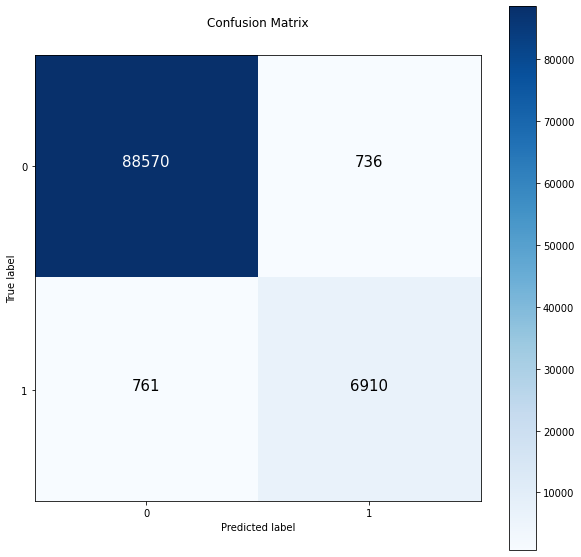

In [53]:
make_confusion_matrix(y_val,base_preds, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

1. The model was unable to differentiate  between classes due to the data imbalance

## Model 2 : Ensemble logistic regression + naive bayes

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
from sklearn.ensemble import VotingClassifier

######################
# custom transformer for sklearn pipeline
class ColumnExtractor(TransformerMixin, BaseEstimator):
    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
      if len(self.cols) == 1:
        return X[self.cols[0]]
      else:
        return X[self.cols]

    def fit(self, X, y=None):
        return self

# fit clf1 with df1
pipe1 = Pipeline([
    ('col_extract', ColumnExtractor( cols= ['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat'] )), # selecting features 0 and 1 (df1) to be used with LR (clf1)
    ('clf', LogisticRegression(class_weight = 'balance'))
    ])

pipe1.fit(df_train, y_train) # sanity check
print(f'accuracy - pipe1, logistic regression :{pipe1.score(df_val,y_val)}') # sanity check

# fit clf2 with df2
pipe2 = Pipeline([
    ('col_extract', ColumnExtractor( cols=['text'])), # selecting features 2 and 3 (df2) to be used with SVC (clf2)
    ('tfidf',TfidfVectorizer()),
    ('clf', MultinomialNB())
    ])

pipe2.fit(df_train, y_train) # sanity check
print(f'accuracy - pipe2, MultinomialNB , with TFidfVectorizer:{pipe2.score(df_val,y_val)}') # sanity check

######################
# ensemble/voting classifier where clf1 fitted with df1 and clf2 fitted with df2
eclf = VotingClassifier(estimators=[('df1-clf1', pipe1), ('df2-clf2', pipe2)], voting='soft', weights= [1.5, 0.5])
eclf.fit(df_train, y_train)
print(f'accuracy - voting classifier with pipe1 and pipe 2 :{eclf.score(df_val,y_val)}')


accuracy - pipe1, logistic regression :0.9845633500726977
accuracy - pipe2, MultinomialNB , with TFidfVectorizer:0.9217649545768585
accuracy - voting classifier with pipe1 and pipe 2 :0.9812120399682399


In [55]:
model_2_predictions = eclf.predict(df_val)

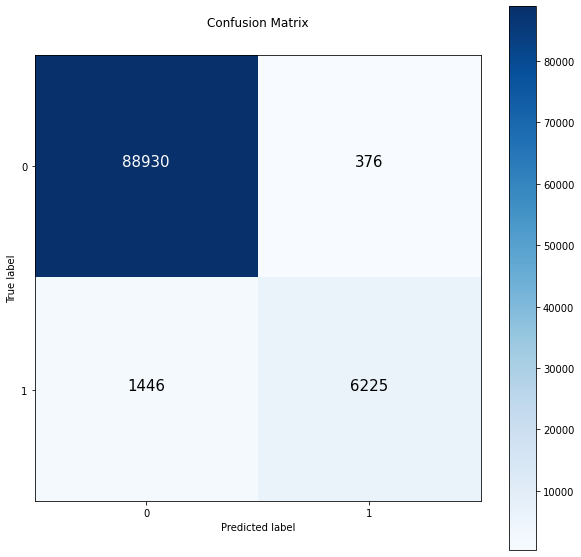

In [56]:
make_confusion_matrix(y_val,model_2_predictions, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)

## Model 3 : USE encoder

In [57]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        trainable = False,
                                        name = 'universal_sentence_encoder')

In [58]:
import tensorflow as tf
from tensorflow.keras import layers

In [178]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline as imblearnpipe


# ros = RandomOverSampler(sampling_strategy = {0:457046,1:457046},random_state=42)
# rus = RandomUnderSampler(sampling_strategy = {0:100000,1:100000} , random_state=42)

# imbpipe = imblearnpipe([('ros',ros)])
# X_train, y_train = imbpipe.fit_resample(df_train[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat','text']], df_train['toxicity'])
X_train = df_train[['identity_attack','insult','obscene','severe_toxicity','sexual_explicit','threat','text']]
y_train = df_train['toxicity']

In [179]:
#1.
token_inputs = layers.Input(shape = [], dtype = tf.string , name = 'token_inputs')
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_outputs,
                             name = 'token_model')

#2.
numeric_inputs = layers.Input(shape = (6,) , dtype = tf.int32, name = 'numeric_input')
x = layers.Dense(32, activation = 'relu')(numeric_inputs)
x = layers.Dense(32, activation = 'relu')(x)
numeric_model = tf.keras.Model(inputs = numeric_inputs,
                           outputs = x)

#5. Combine token and char embedding into a hybrid embedding

combined_embeddings = layers.Concatenate(name = 'token_vader')([token_model.output,
                                                                numeric_model.output])


z = layers.Dense(256,activation = 'relu')(combined_embeddings)
z = layers.Dropout(0.5)(z)


#7. Create output layer
output_layer = layers.Dense(2,activation = 'sigmoid' , name = 'output_layer')(z)

#8. Combine model

model_3 = tf.keras.Model(inputs = [token_model.input,
                                   numeric_model.input
                                   ],
                         outputs = output_layer,
                         name = 'token_vader_model')

In [180]:
model_3.summary()

Model: "token_vader_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 numeric_input (InputLayer)     [(None, 6)]          0           []                               
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['token_inputs[0][0]']           
 rasLayer)                                                                                        
                                                                                                  
 dense_33 (Dense)               (None, 32)           224         ['numeric_input[0

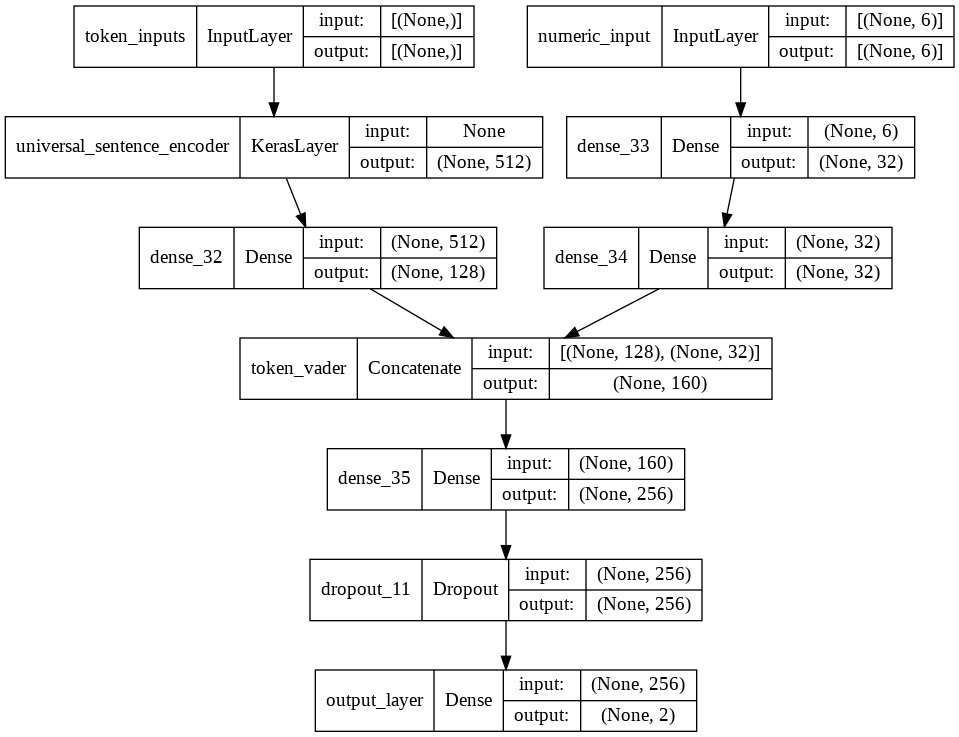

In [181]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes = True)

In [182]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [183]:
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot_encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(y_val.to_numpy().reshape(-1,1))

In [184]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y_train.to_numpy())
val_labels_encoded = label_encoder.transform(y_val.to_numpy())

In [185]:
train_sentences = X_train.text.tolist()
train_numeric = X_train[['identity_attack', 'insult', 'obscene', 'severe_toxicity','sexual_explicit', 'threat']]

val_sentences = df_val.text.tolist()
val_numeric = df_val[['identity_attack', 'insult', 'obscene', 'severe_toxicity','sexual_explicit', 'threat']]

In [186]:
train_token_numeric_data = tf.data.Dataset.from_tensor_slices((train_sentences,
                                                             train_numeric
                                                             ))

train_token_numeric_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_numeric_dataset = tf.data.Dataset.zip((train_token_numeric_data,
                                                   train_token_numeric_labels))

train_token_numeric_dataset = train_token_numeric_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_token_numeric_data = tf.data.Dataset.from_tensor_slices((val_sentences,
                                                             val_numeric
                                                             ))

val_token_numeric_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_numeric_dataset = tf.data.Dataset.zip((val_token_numeric_data,
                                                 val_token_numeric_labels))

val_token_numeric_dataset = val_token_numeric_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [187]:
print(train_token_numeric_dataset)
print(val_token_numeric_dataset)

<PrefetchDataset shapes: (((None,), (None, 6)), (None, 2)), types: ((tf.string, tf.float64), tf.float64)>
<PrefetchDataset shapes: (((None,), (None, 6)), (None, 2)), types: ((tf.string, tf.float64), tf.float64)>


In [188]:
len(y_train)/(y_train.sum())

12.446467479776603

In [189]:
earlystopping = tf.keras.callbacks.EarlyStopping(min_delta = 0.001,monitor = 'val_auc_9', verbose = 1 , patience = 5)

In [190]:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.2),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.AUC(curve='PR')
                )

In [191]:
classweights = {0:1,
                1:len(y_train)/(y_train.sum())}

In [192]:
model_3_history = model_3.fit(train_token_numeric_dataset,
                              steps_per_epoch = int(len(train_token_numeric_dataset)//32),
                              epochs = 20,
                              validation_data = val_token_numeric_dataset,
                              class_weight = classweights,
                              validation_steps = int(len(val_token_numeric_dataset)//32),
                              callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath = 'model_checkpoint',
                                                                              monitor = 'val_auc_9',
                                                                              save_best_only = True,
                                                                              save_weights_only = False),
                                           earlystopping])

Epoch 1/20
484/485 [============================>.] - ETA: 0s - loss: 1.1633 - auc_9: 0.7715INFO:tensorflow:Assets written to: model_checkpoint/assets


INFO:tensorflow:Assets written to: model_checkpoint/assets


485/485 [==============================] - 42s 79ms/step - loss: 1.1641 - auc_9: 0.7717 - val_loss: 0.6310 - val_auc_9: 0.7543
Epoch 2/20
485/485 [==============================] - 15s 31ms/step - loss: 1.0936 - auc_9: 0.8227 - val_loss: 0.5573 - val_auc_9: 0.8599
Epoch 3/20
485/485 [==============================] - 15s 31ms/step - loss: 1.0968 - auc_9: 0.8235 - val_loss: 0.6104 - val_auc_9: 0.7875
Epoch 4/20
485/485 [==============================] - 15s 31ms/step - loss: 1.0562 - auc_9: 0.8414 - val_loss: 0.5510 - val_auc_9: 0.8719
Epoch 5/20
485/485 [==============================] - 15s 31ms/step - loss: 1.0860 - auc_9: 0.8382 - val_loss: 0.5857 - val_auc_9: 0.8102
Epoch 6/20
485/485 [==============================] - 16s 32ms/step - loss: 1.0892 - auc_9: 0.8308 - val_loss: 0.5882 - val_auc_9: 0.8230
Epoch 00006: early stopping


In [193]:
model_3 = tf.keras.models.load_model('model_checkpoint/')

In [194]:
model_3.evaluate(val_token_numeric_dataset)

3031/3031 [==============================] - 75s 25ms/step - loss: 0.6274 - auc_9: 0.7616


[0.6274358630180359, 0.761631965637207]

In [195]:
preds = model_3.predict(val_token_numeric_dataset)

In [196]:
preds

array([[0.72661656, 0.2748922 ],
       [0.6842146 , 0.32085103],
       [0.5554041 , 0.44117725],
       ...,
       [0.3379691 , 0.6676854 ],
       [0.93383706, 0.06279226],
       [0.69949615, 0.30179092]], dtype=float32)

In [197]:
predictions = np.argmax(preds,axis = 1)

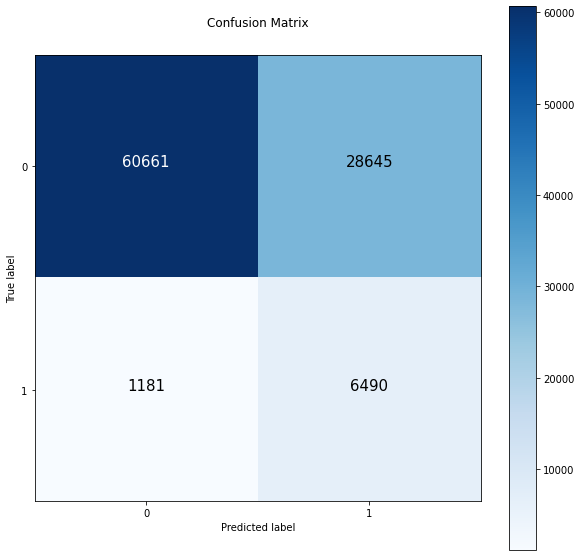

In [198]:
make_confusion_matrix(y_val,predictions, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False)